# Benchmark DRL with Q-Network

```BibTeX
@article{theate2021application,
  title={An application of deep reinforcement learning to algorithmic trading},
  author={Th{\'e}ate, Thibaut and Ernst, Damien},
  journal={Expert Systems with Applications},
  volume={173},
  pages={114632},
  year={2021},
  publisher={Elsevier}
}
```

## Setup Notebook

In [1]:
import os
import pandas as pd
import numpy as np
import warnings
import sys
warnings.filterwarnings("ignore")

INSTALL_DEPS = False
if INSTALL_DEPS:
    # If Kaggle or Colab, you have to manage these. If local, install requirements.txt
    %pip install yfinance==0.2.43
    %pip install scipy==1.14.1
    %pip install statsmodels==0.14.2
    %pip install tabulate==0.9.0
    %pip install torch==2.3.0
    %pip install tqdm==4.66.4

IN_KAGGLE = IN_COLAB = False
try:
    # https://www.tensorflow.org/install/pip#windows-wsl2
    import google.colab
    from google.colab import drive

    drive.mount("/content/drive")
    DATA_PATH = "/drive/input/drl-dataset-quant"
    IN_COLAB = True
    print("Colab!")
except:
    IN_COLAB = False
if "KAGGLE_KERNEL_RUN_TYPE" in os.environ and not IN_COLAB:
    print("Running in Kaggle...")
    for dirname, _, filenames in os.walk("/kaggle/input"):
        for filename in filenames:
            print(os.path.join(dirname, filename))
    DATA_PATH = "/kaggle/input/drl-dataset-quant"
    sys.path.insert(1, "/kaggle/usr/lib/drlutil")
    IN_KAGGLE = True
    print("Kaggle!")
elif not IN_COLAB:
    IN_KAGGLE = False
    DATA_PATH = "./data/"
    print("running localhost!")

running localhost!


In [2]:
from drlutil import TradingSimulator

## Experiment Parameters

In [3]:
simulator = TradingSimulator()
strategy = "TDQN"
stock = "Tesla"

startingDate = '2012-1-1'
endingDate = '2020-1-1'
splitingDate = '2018-1-1'
features=['Open', 'High', 'Low', 'Close', 'Volume']


# Run Experiments

## Test Selected Stock and Strategy

INFO:root:Training progression (hardware selected => cuda:0):
100%|██████████| 50/50 [16:15<00:00, 19.51s/it]
INFO:root:
╒═══════════════════════════╤══════════╕
│   Performance Indicator   │   TDQN   │
╞═══════════════════════════╪══════════╡
│    Profit & Loss (P&L)    │ 14440212 │
├───────────────────────────┼──────────┤
│     Annualized Return     │  37.03%  │
├───────────────────────────┼──────────┤
│   Annualized Volatility   │  45.71%  │
├───────────────────────────┼──────────┤
│       Sharpe Ratio        │  2.047   │
├───────────────────────────┼──────────┤
│       Sortino Ratio       │  3.270   │
├───────────────────────────┼──────────┤
│     Maximum Drawdown      │  13.42%  │
├───────────────────────────┼──────────┤
│ Maximum Drawdown Duration │ 16 days  │
├───────────────────────────┼──────────┤
│       Profitability       │  54.62%  │
├───────────────────────────┼──────────┤
│ Ratio Average Profit/Loss │  4.872   │
├───────────────────────────┼──────────┤
│         Skewness

(<drlutil.TDQN at 0x7f43aead39a0>,
 <drlutil.TradingEnv at 0x7f45253f9180>)

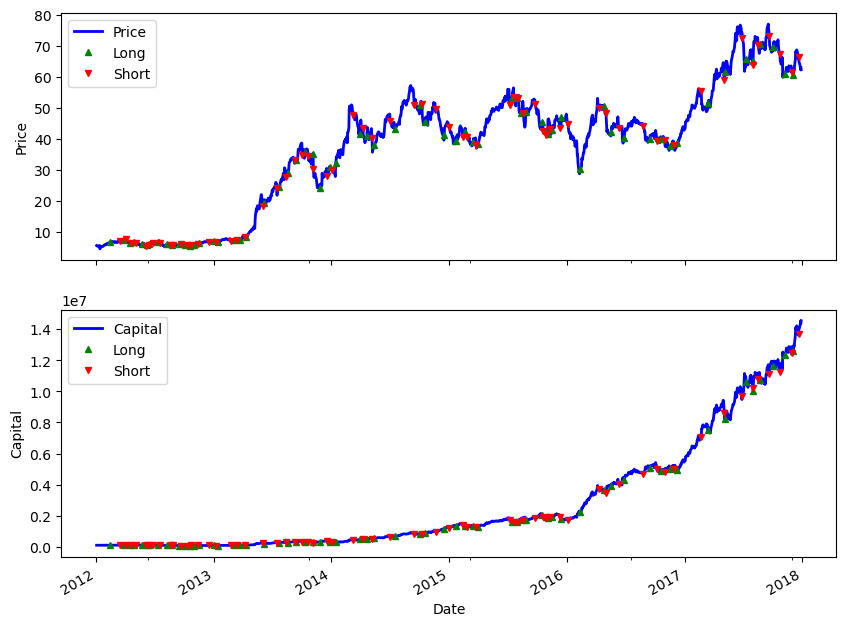

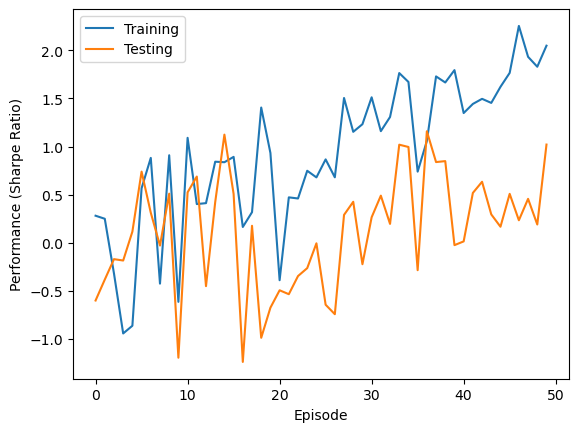

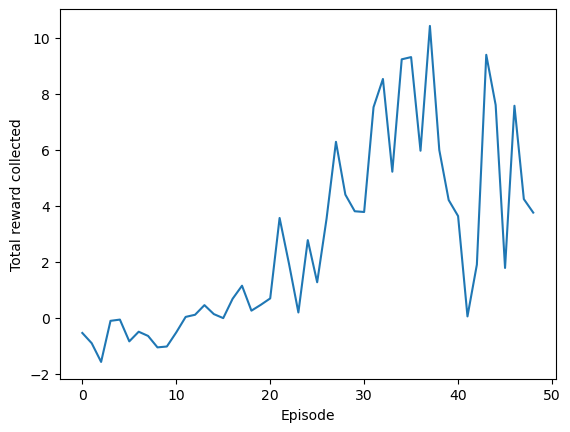

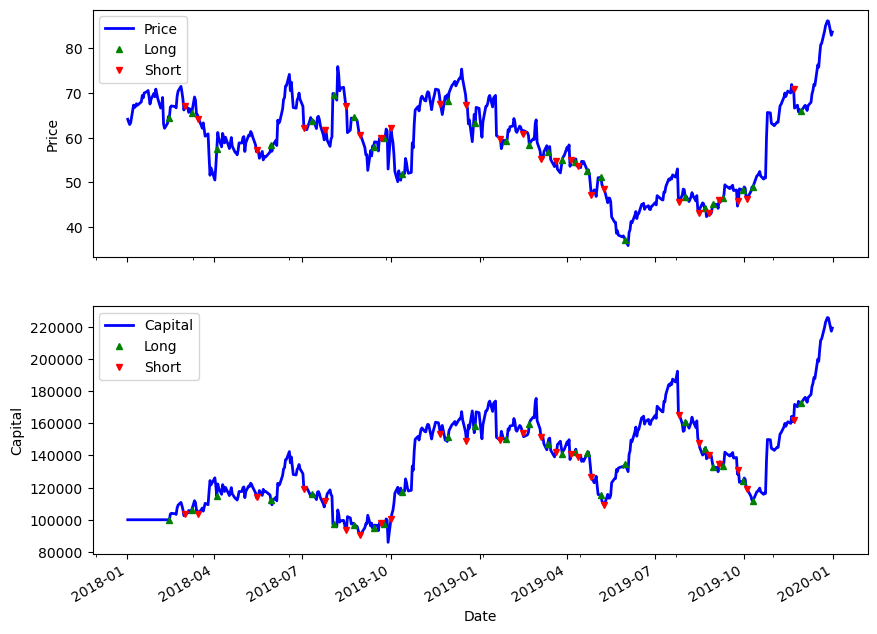

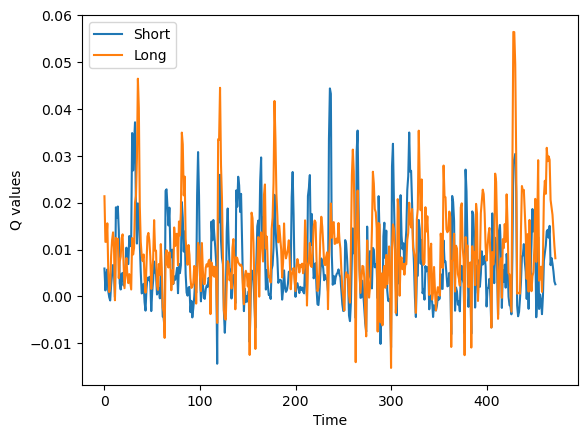

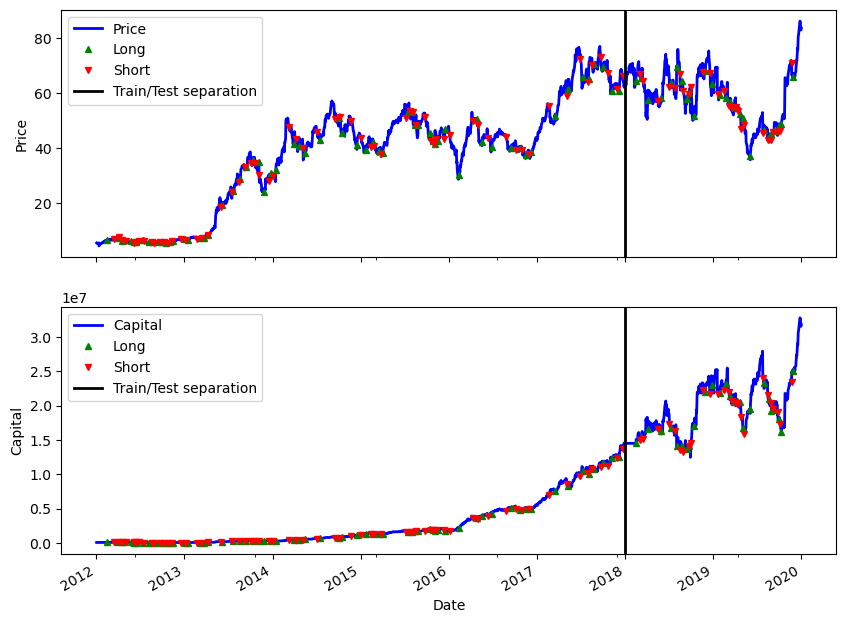

In [4]:

simulator.simulateNewStrategy(strategy,
                              stock,
                              startingDate=startingDate,
                              endingDate=endingDate,
                              splitingDate=splitingDate,
                              saveStrategy=True,
                              data_dir=DATA_PATH,
                              features=features)


## Results

Training time for 50 iterations 16:15

| Performance Indicator           | Training  | Testing  | B&H      | S&H      | TF      | MR      | TDQN    |
|----------------------------------|-----------|----------|----------|----------|---------|---------|---------|
| Profit & Loss (P&L)              | 14440212  | 119066   | 29847    | -29847   | 73301   | 8600    | 98      |
| Annualized Return                | 37.03%    | 43.26%   | 24.11%   | -7.38%   | 100.00% | 19.02%  | 12.80%  |
| Annualized Volatility            | 45.71%    | 51.47%   | 53.14%   | 46.11%   | 52.70%  | 58.05%  | 52.09%  |
| Sharpe Ratio                     | 2.047     | 1.020    | 0.508    | -0.154   | 0.987   | 0.358   | 0.261   |
| Sortino Ratio                    | 3.270     | 1.409    | 0.741    | -0.205   | 1.229   | 0.539   | 0.359   |
| Maximum Drawdown                 | 13.42%    | 41.86%   | 52.83%   | 54.09%   | 79.91%  | 65.31%  | 58.95%  |
| Maximum Drawdown Duration        | 16 days   | 55 days  | 205 days | 144 days | 229 days| 159 days| 331 days|
| Profitability                    | 54.62%    | 41.51%   | 100.00%  | 0.00%    | 34.38%  | 67.65%  | 38.18%  |
| Ratio Average Profit/Loss        | 4.872     | 2.465    | ∞        | 0.00     | 0.534   | 0.496   | 1.621   |